In [149]:
install.packages("backports")
install.packages('broom')
library('broom')
library(tidyverse)
library(httr)
library(dplyr)
library(rvest)
library(tibble)
library(ggplot2)
library(lubridate) 
install.packages('ggpubr')
library('ggpubr')
library('GoFKernel')
library(scales)


  There is a binary version available but the source version is later:
          binary source needs_compilation
backports  1.2.1  1.4.1              TRUE

  Binaries will be installed
package 'backports' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Utente\AppData\Local\Temp\RtmpOu5Dco\downloaded_packages


also installing the dependencies 'rlang', 'dplyr', 'tibble', 'tidyr'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
rlang  0.4.11  1.0.2              TRUE
dplyr   1.0.6  1.0.8              TRUE
tibble  3.1.1  3.1.6              TRUE
tidyr   1.1.3  1.2.0              TRUE
broom   0.7.6  0.8.0             FALSE

  Binaries will be installed


Warning message:
"packages 'rlang', 'dplyr', 'tibble', 'tidyr' are in use and will not be installed"installing the source package 'broom'

Warning message in install.packages("broom"):
"installation of package 'broom' had non-zero exit status"

package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Utente\AppData\Local\Temp\RtmpOu5Dco\downloaded_packages


Warning message:
"package 'ggpubr' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'ggpubr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'broom' 0.5.2 is already loaded, but >= 0.7.4 is required


The triangular distribution, in the interval $(a,b)$, is given by the following:

$ f(x) = \begin{cases} \frac{2(x−a)}{(b−a)(c−a)} & a \leq x < c     \\ 
                        \frac{2(b−x)}{(b−a)(b−c)} & c \leq x \leq b  \\
                        0                & \mbox{othervise} \\    
          \end{cases} $
where $c \in (a,b)$

a) plot the function, given the interval (a; b)

b) and write an algorithm to generate random numbers from the triangular distribution

c) generate $10^4$ random number from the distribution, show them in an histogram and
superimpose the analytical curve

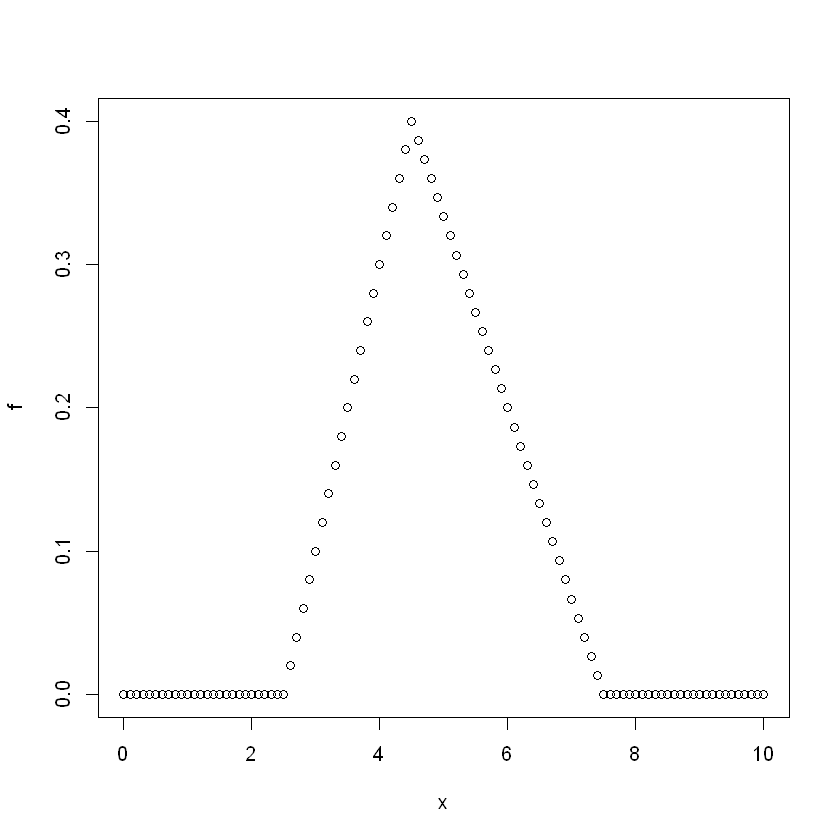

In [1]:
f <- function(x, a, b, c){
    y <- ifelse ( (x<c & x>=a),2*(x−a)/((b−a)*(c−a)),
                   ifelse ( (x<=b & x>=c),2*(b−x)/((b−a)*(b−c)),
                             0)
                )
    return(y)
}
f <- Vectorize(f)
x <- seq(0, 10, 0.1)
plot(x, f(x, 2.5, 7.5, 4.5),
        ylab="f",
        xlab="x",)

In [5]:
#acceptance/rejection method to generate random number
rand_f <- Vectorize(function(n, a, b, c){
                y <- NULL
                while(length(y)<n){
                    u1 <- runif(n, a, b)
                    u2 <- runif(n, 0, 1)
                    yclean <- ifelse(u2 * c < f(u1, a, b, c),
                                u1,
                                NA)
                    ys <- na.omit(yclean)
                    y <- c(y, yclean)
                    }
                return(y)
                })

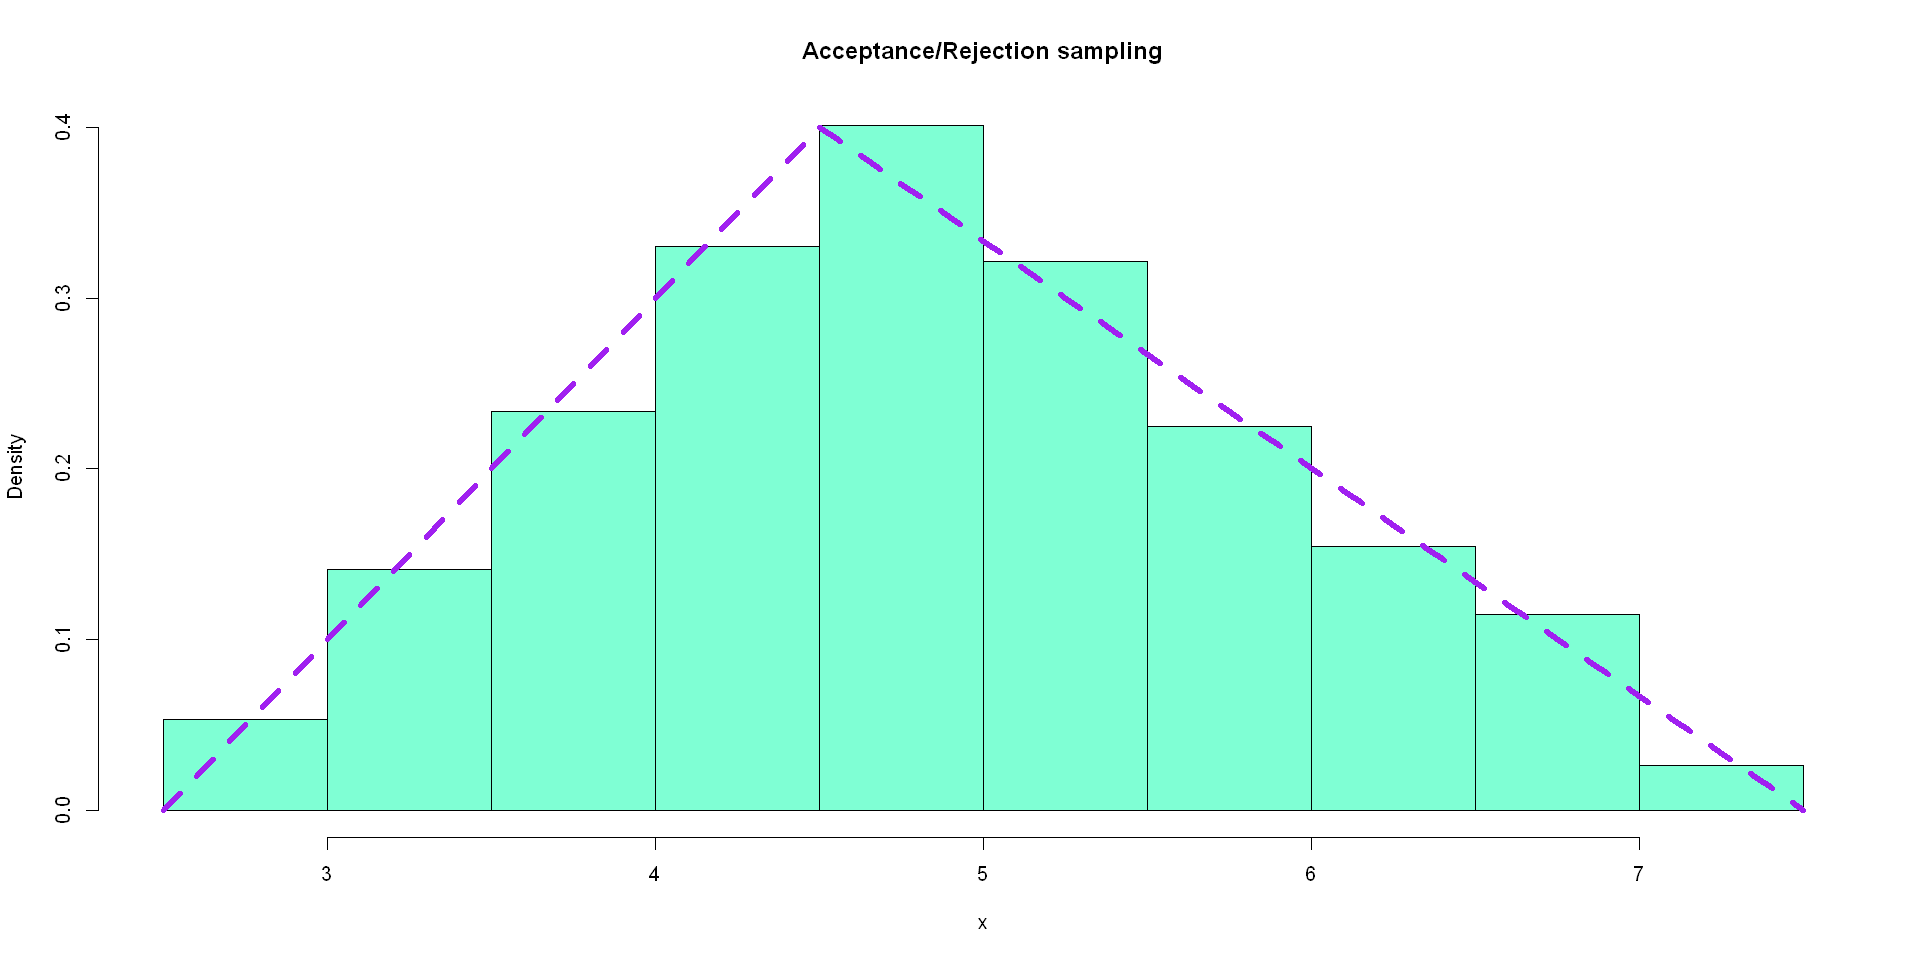

In [21]:
n <- 10000
a <- 2.5
b <- 7.5
c <- 4.5
options(repr.plot.width=16, repr.plot.height=8)  #to set graph size
hist(rand_f(n, a, b, c), freq=FALSE,
     col="aquamarine", xlab="x",
     main="Acceptance/Rejection sampling")
curve(f(x, a, b, c), col="purple", lt="dashed", lw=5, add=TRUE)

Markov's inequality represents an upper bound to probability distributions:

$$
 P(X \geq k) \leq \frac{E[X]}{k} \text{  for } k > 0
$$

Having defined a function

$$
G(k) = 1 - F(k) \equiv P(X \geq k)
$$

plot $G(k)$ and the Markov's upper bound for:

a) the exponential, $Exp(\lambda = 1)$, distribution function

b) the uniform, $U(3; 5)$, distribution function

c) the binomial, $Bin(n = 1; p = 1=2)$, distribution function

d) a Poisson, $Pois(\lambda = 1=2)$, distribution function


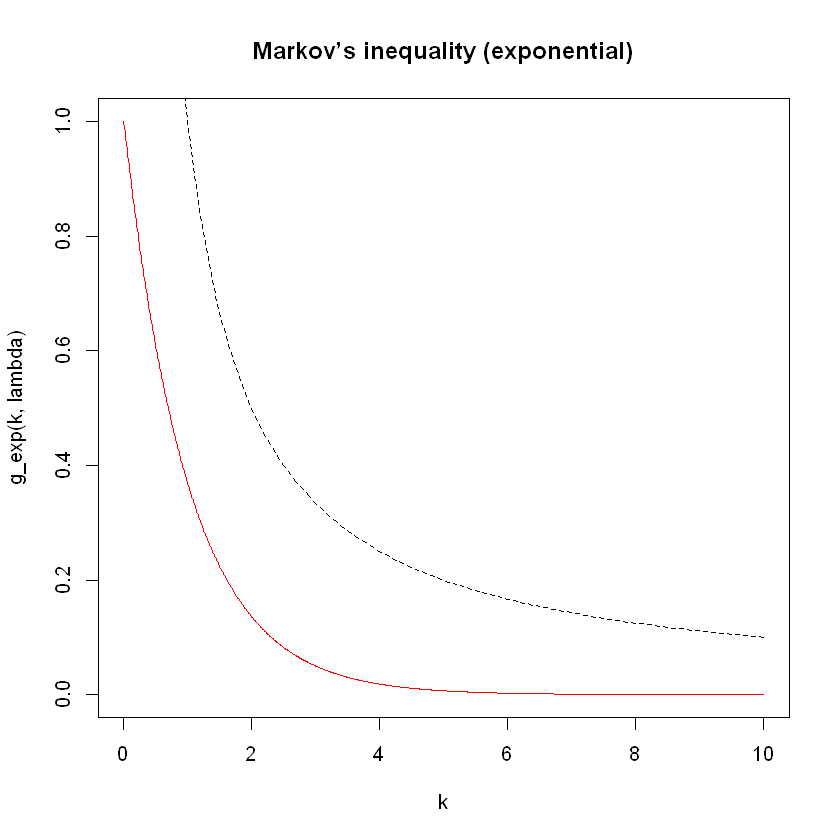

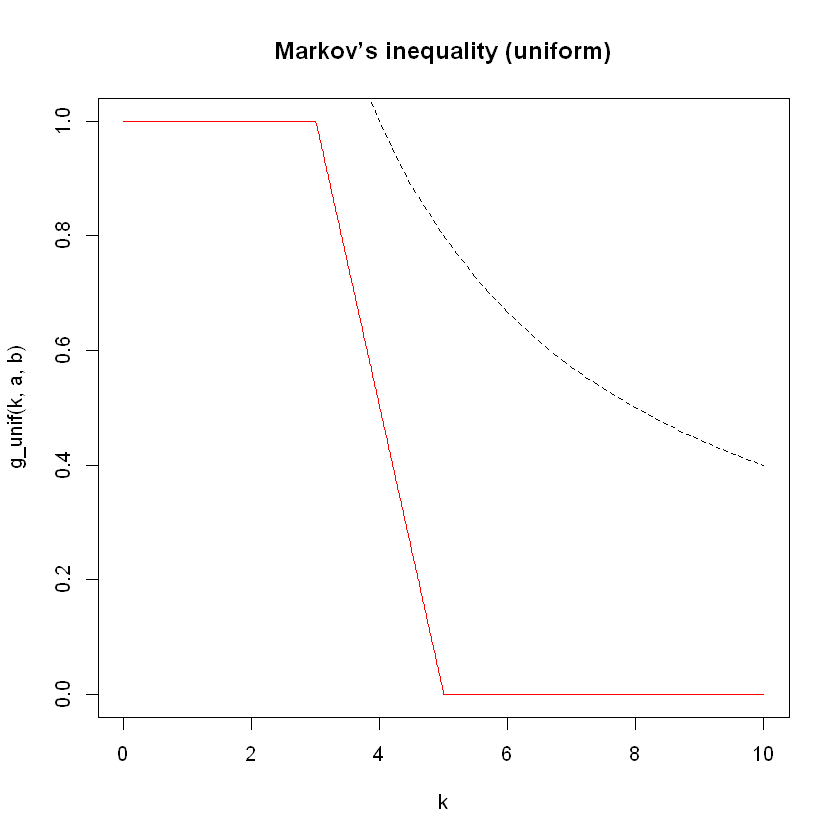

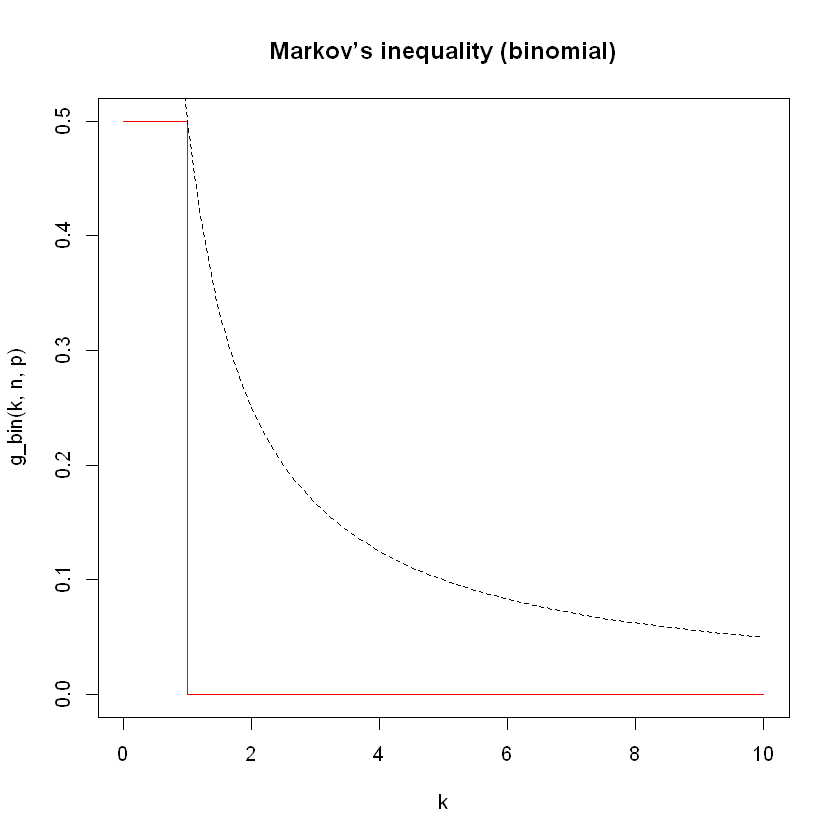

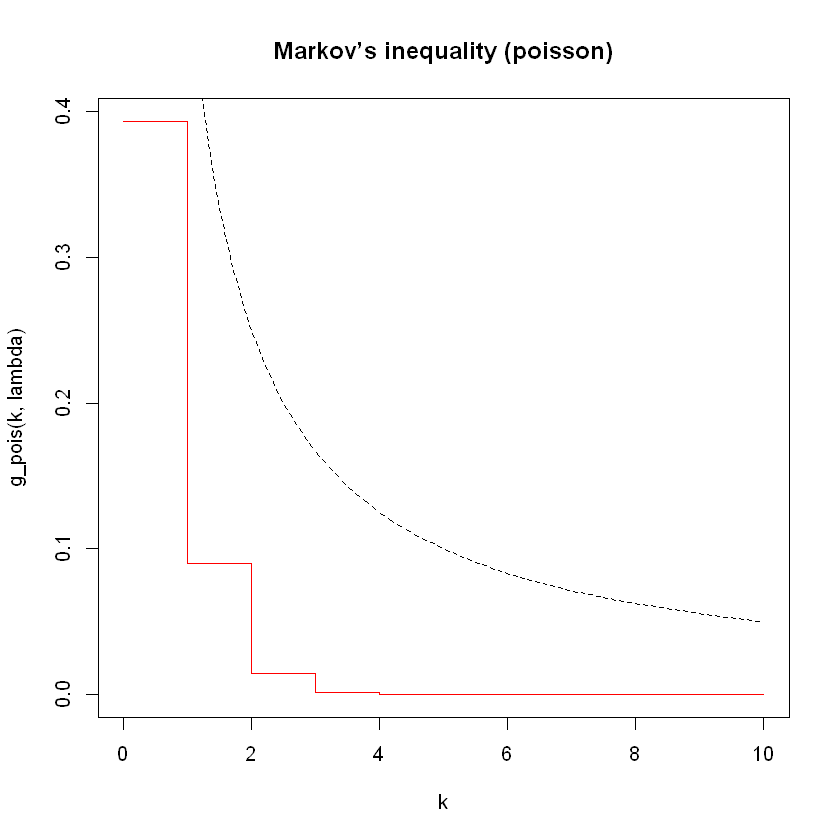

In [61]:
#G(k)
g_exp  <- function(k, lambda) {1- pexp(k, lambda)}       
g_unif <- function(k, a, b) {1- punif(k, a, b)}    
g_bin  <- function(k, n , p) {1- pbinom(k, n, p)}  
g_pois <- function(k, lambda) {1- ppois(k, lambda)}      

#exponential distribution
k <- seq(0, 10, 0.01)
lambda <- 1
plot(k, g_exp(k, lambda), type='l', col='red', main='Markov’s inequality (exponential)') #G(k)
lim <- function(x) {1/(lambda*x)} #E[X]/k
curve(lim, add=TRUE,lt="dashed")

#uniform distribution
k <- seq(0, 10, 0.01)
a <- 3
b <- 5
plot(k, g_unif(k, a, b), type='l', col='red', main='Markov’s inequality (uniform)')
lim <- function(x) {(a+b)/(2*x)}
curve(lim, add=TRUE,lt="dashed")

#binomial distribution
k <- seq(0, 10, 0.01)
n <- 1
p <- 1/2
plot(k, g_bin(k, n, p), type='l', col='red', main='Markov’s inequality (binomial)')
lim <- function(x) {n*p/x}
curve(lim, add=TRUE,lt="dashed")

#poisson distribution
k <- seq(0, 10, 0.01)
lambda <- 1/2
plot(k, g_pois(k, lambda), type='l', col='red', main='Markov’s inequality (poisson)')
lim <- function(x) {lambda/x}
curve(lim, add=TRUE,lt="dashed")


\begin{equation}
 P(|X - \mu | \geq k \sigma) \leq \frac{1}{k^2}
\end{equation}

which can also be written as

\begin{equation}
 P(|X - \mu | \geq k \sigma) \geq 1- \frac{1}{k^2}
\end{equation}

Use R to show, with a plot, that Chebyshev's inequality is is an upper bound to the following distributions:

a) a normal distribution, $N(\mu = 3, \sigma = 5)$

b) an exponential, $Exp(\lambda = 1)$

c) a uniform distribution, $U(1 - \sqrt{2}; 1 + \sqrt{2})$

d) a Poisson, $Pois(\lambda = 1/3)$, distribution function


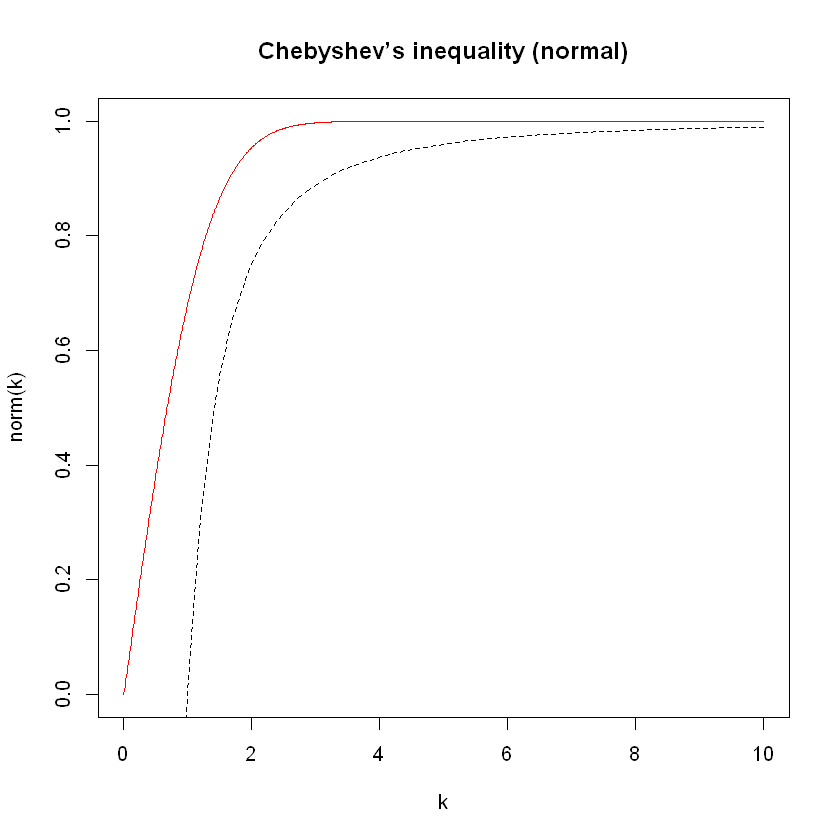

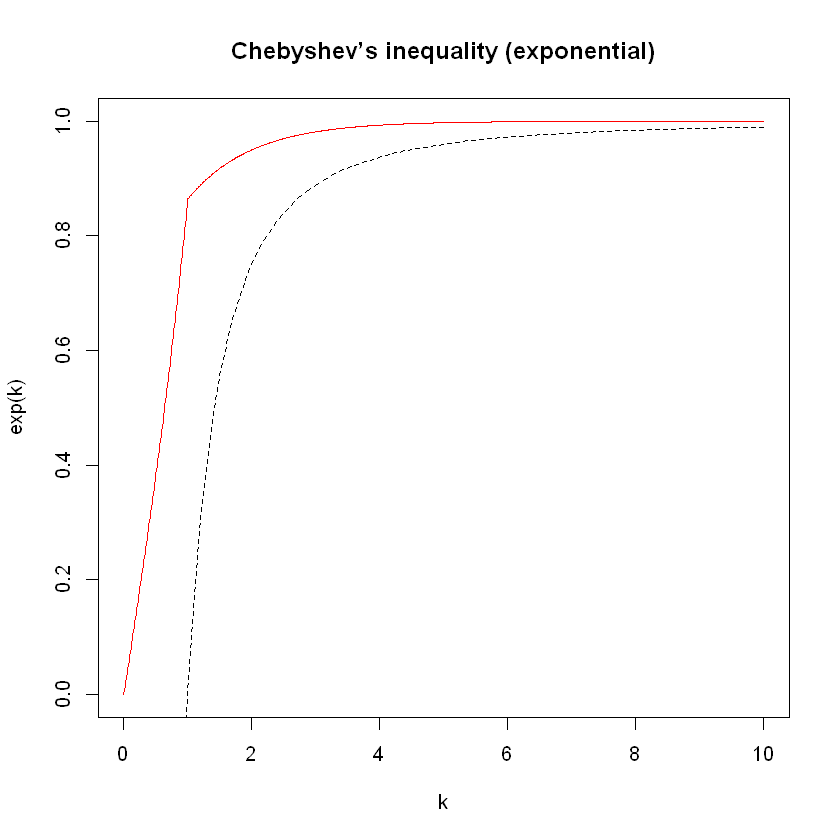

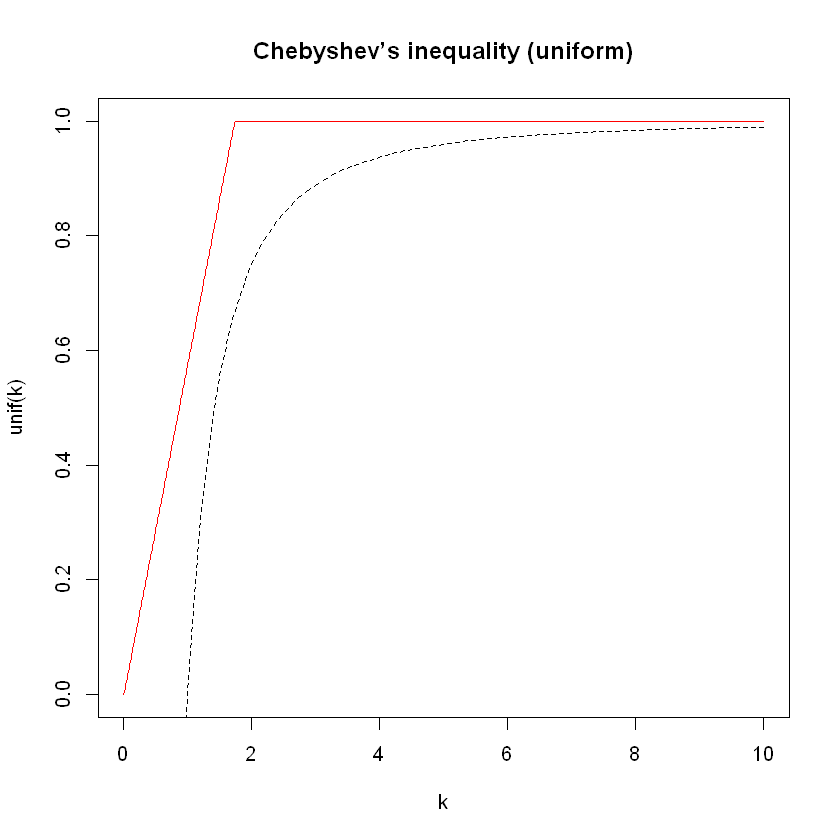

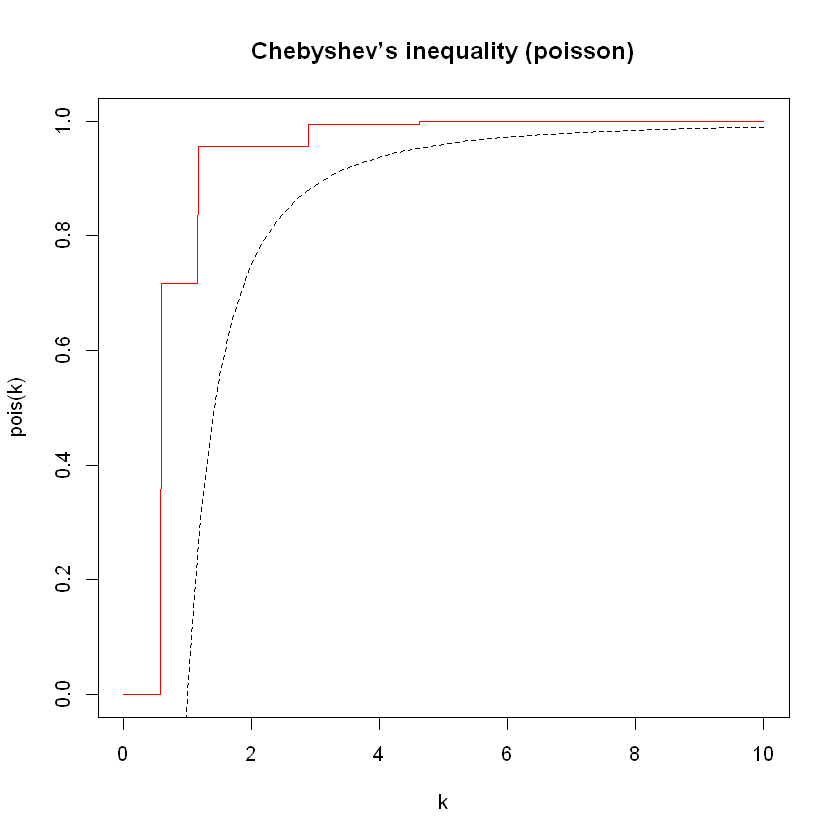

In [60]:
norm <- function(x) {pnorm(mu+x*sigma, mu, sigma) - pnorm(mu-x*sigma, mu, sigma)}
exp <- function(x)  {pexp(mu+k*sigma, mu)-pexp(mu-k*sigma, mu)}
unif <- function(x) {punif(mu+x*sigma, a, b) - punif(mu-x*sigma, a, b)}
pois <- function(x) {ppois(mu+x*sigma, lambda) - ppois(mu-x*sigma, lambda)}

#normal distribution
k <- seq(0, 10, 0.01)
mu <- 3
sigma <- 5
plot(k, norm(k), type='l', col='red', main='Chebyshev’s inequality (normal)')
lim <- function(k) {1-1/k^2} #1-1/k^2
curve(lim, add=TRUE, lt='dashed')

#exponential distribution
k <- seq(0, 10, 0.01)
lambda <- 1
mu <- 1/lambda
sigma <- 1/lambda
plot(k, exp(k), type='l', col='red', main='Chebyshev’s inequality (exponential)')
lim <- function(k) {1-1/k^2}
curve(lim, add=TRUE, lt='dashed')


#uniform distribution
k <- seq(0, 10, 0.01)
a <- 1-sqrt(2)
b <- 1+sqrt(2)
mu <- (a+b)/2
sigma <- (b-a)/sqrt(12)
plot(k, unif(k), type='l', col='red', main='Chebyshev’s inequality (uniform)')
lim <- function(k) {1-1/k^2}
curve(lim, add=TRUE, lt='dashed')

#poisson distribution
k <- seq(0, 10, 0.01)
lambda <- 1/3
mu <- lambda
sigma <- sqrt(lambda)
plot(k, pois(k), type='l', col='red', main='Chebyshev’s inequality (poisson)')
lim <- function(k) {1-1/k^2}
curve(lim, add=TRUE, lt='dashed')


The six boxes toy model is described in reference [1].
Labeling the boxes as follows:

* $H_0$ is the box with 0 white stones
* $H_1$ is the box with 1 white stones
* $H_2$ is the box with 2 white stones
* $H_3$ is the box with 3 white stones
* $H_4$ is the box with 4 white stones
* $H_5$ is the box with 5 white stones

write a program in R that:

1) Allows the user to insert the color of a randomly extracted stone

2) Prints on the standard output the probability of selecting each box

3) Plots the probability for each box as a function of the extraction step

In [166]:
#write a function to compute the probability according to Bayes theorem
#n-th trial, of having selected the k-th box 
#given the background information from the previous n-1 trials
prob<- function(extractions){      
    N <- length(extractions)
    #initial probability of every box: 1/6
    p_H0 <- c(1/6, rep(0, N)) # vector with updated probabilities of having selected H0 box 
    p_H1 <- c(1/6, rep(0, N)) 
    p_H2 <- c(1/6, rep(0, N)) 
    p_H3 <- c(1/6, rep(0, N)) 
    p_H4 <- c(1/6, rep(0, N)) 
    p_H5 <- c(1/6, rep(0, N)) 
    df_p_H <- data.frame(p_H0, p_H1, p_H2, p_H3, p_H4, p_H5)     
    for (i in 1:N){             
        for(k in 0:5){
            p_w <- k/5     # prob of getting white at n-th extraction having selected the k-th box
            p_b <- (5-k)/5 # Prob of getting black...
            
            df_p_H[i+1, k+1] <- ifelse(extractions[i] == 0,
                                     p_w*df_p_H[i, k+1], # extract white
                                     p_b*df_p_H[i, k+1]) # extract black
            
            #compute normalization factor
            norm <- sum(df_p_H[i, ])
            
            df_p_H[i+1, k+1] <- df_p_H[i+1, k+1]/norm
                 
        }
        
    
    }
    
    return(df_p_H)   
}

plot <- function(df_p_H){
    
    options(repr.plot.width=10, repr.plot.height=6)
    H0 <- ggplot(df_p_H) +
                geom_point(aes(x=as.numeric(row.names(df_p_H))-1, y = p_H0), color = "cyan1", size = 2) +
                labs(title = "box H0") +
                scale_x_continuous(name= "Ex")+
                scale_y_continuous(name= "Prob")
    H1 <- ggplot(df_p_H) +
                geom_point(aes(x=as.numeric(row.names(df_p_H)), y = p_H1), color = "gold2", size = 2) +
                labs(title = "box H1") +
                scale_x_continuous(name= "Ex")+
                scale_y_continuous(name= "Prob")
    H2 <- ggplot(df_p_H) +
                geom_point(aes(x=as.numeric(row.names(df_p_H))-1, y = p_H2), color = "mediumorchid3", size = 2) +
                labs(title = "box H2") +
                scale_x_continuous(name= "Ex")+
                scale_y_continuous(name= "Prob")
    H3 <- ggplot(df_p_H) +
                geom_point(aes(x=as.numeric(row.names(df_p_H))-1, y = p_H3), color = "orangered1", size = 2) +
                labs(title = "box H3") +
                scale_x_continuous(name= "Ext") +
                scale_y_continuous(name= "Prob")
    H4 <- ggplot(df_p_H) +
                geom_point(aes(x=as.numeric(row.names(df_p_H))-1, y = p_H4), color = "springgreen2", size = 2) +
                labs(title = "box H4") +
                scale_x_continuous(name= "Ex")+
                scale_y_continuous(name= "Prob")
    H5 <- ggplot(df_p_H) +
                geom_point(aes(x=as.numeric(row.names(df_p_H))-1, y = p_H5), color = "hotpink3", size = 2) +
                labs(title = "box H5") +
                scale_x_continuous(name= "Ex") +
                scale_y_continuous(name= "Prob")
    ggarrange(H0, H1, H2, H3, H4, H5)
} 

Consider again the six boxes toy model of the previous exercise and write a simulation program that:

1) Selects a random box

2) Makes random sampling from the box

3) Prints on the standard output the probability of selecting each box

4) Plots the probability for each box as a function of the number of trial

p_H0,p_H1,p_H2,p_H3,p_H4,p_H5
0.1666667,1.666667e-01,1.666667e-01,1.666667e-01,0.166666667,0.1666667
0.0000000,3.333333e-02,6.666667e-02,1.000000e-01,0.133333333,0.1666667
0.0000000,1.333333e-02,5.333333e-02,1.200000e-01,0.213333333,0.3333333
0.0000000,3.636364e-03,2.909091e-02,9.818182e-02,0.232727273,0.4545455
0.0000000,8.888889e-04,1.422222e-02,7.200000e-02,0.227555556,0.5555556
0.0000000,2.042901e-04,6.537283e-03,4.964249e-02,0.209193054,0.6384065
0.0000000,4.519774e-05,2.892655e-03,3.294915e-02,0.185129944,0.7062147
0.0000000,9.748964e-06,1.247867e-03,2.132098e-02,0.159727029,0.7616378
0.0000000,2.065582e-06,5.287891e-04,1.355229e-02,0.135369997,0.8068681
0.0000000,4.319850e-07,2.211763e-04,8.502761e-03,0.113242285,0.8437208


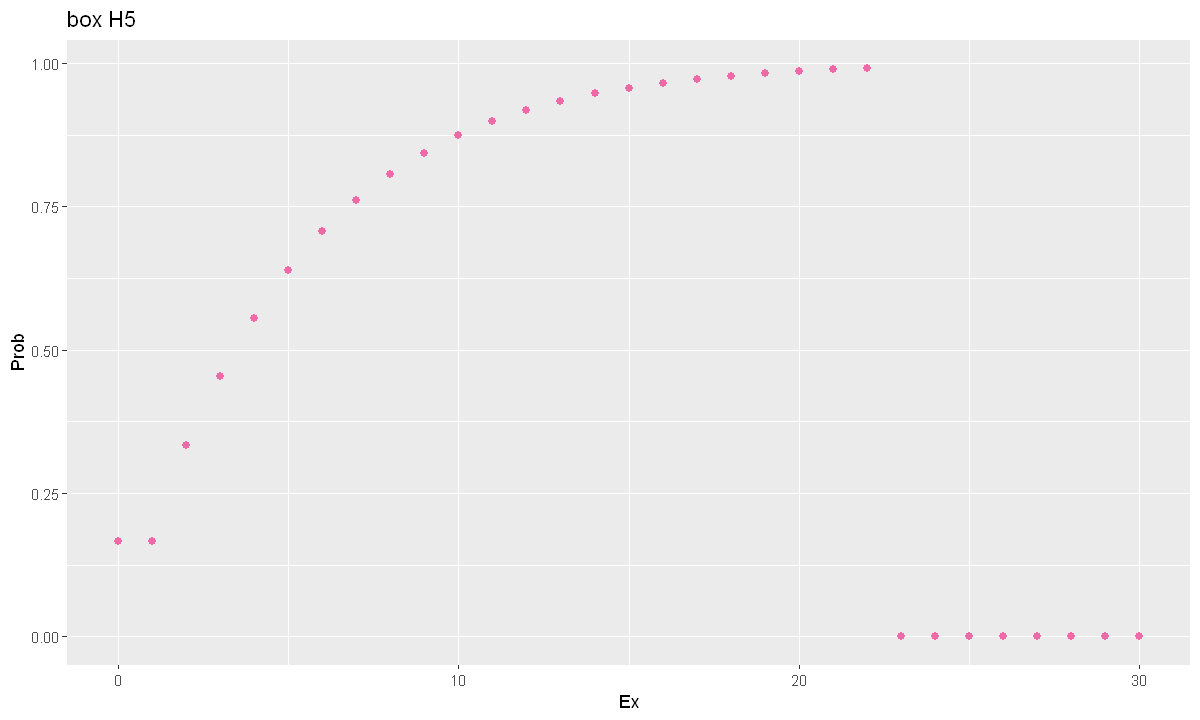

In [172]:
#random box
k <- sample(0:5,1)

#random sampling
B0 <- c(1,1,1,1,1)
B1 <- c(0,1,1,1,1)
B2 <- c(0,0,1,1,1)
B3 <- c(0,0,0,1,1)
B4 <- c(0,0,0,0,1)
B5 <- c(0,0,0,0,0)
N <- 30 
extractions <- NULL

if(k == 0){
    extractions <- sample(B0, N, replace = TRUE)
    }else if(k == 1){
    extractions <- sample(B1, N, replace = TRUE)
    }else if(k == 2){
    extractions <- sample(B2, N, replace = TRUE)
    }else if(k == 3){
    extractions <- sample(B3, N, replace = TRUE)
    }else if(k == 4){
    extractions <- sample(B4, N, replace = TRUE)
    }else {
    extractions <- sample(B5, N, replace = TRUE)
    }


#probability dataframe, selecting each box with new extractions
prob(extractions)
df <- prob(extractions)

#probability for each box as function of the number of trial
plot(df)